<a href="https://colab.research.google.com/github/AhmedAbdoulahi/DataScience/blob/master/TP_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
iris = pd.read_csv("Iris.csv")

print("Taille du jeu de données :")
print(iris.shape)

Taille du jeu de données :
(150, 6)


In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
#supprimons la colonne n'apportant pas d'info
iris.drop('Id',axis=1,inplace=True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

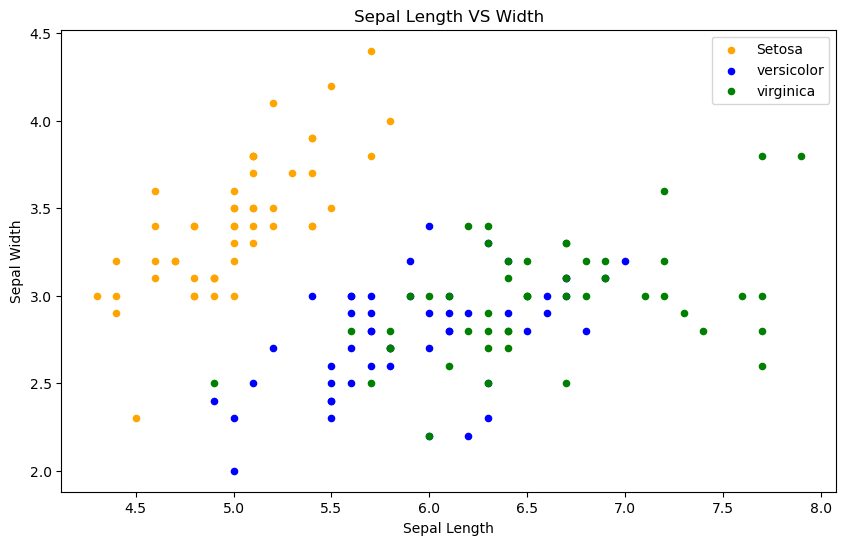

In [ ]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

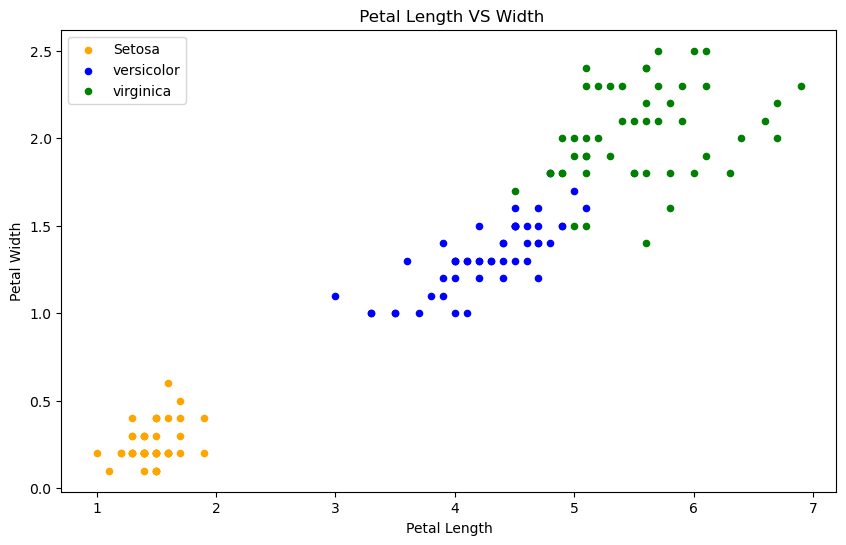

In [ ]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
train, test = train_test_split(iris, test_size = 0.3)

print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [ ]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y=train.Species
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y =test.Species

In [ ]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
28,5.2,3.4,1.4,0.2
39,5.1,3.4,1.5,0.2
2,4.7,3.2,1.3,0.2
101,5.8,2.7,5.1,1.9
114,5.8,2.8,5.1,2.4


In [ ]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
70,5.9,3.2,4.8,1.8
48,5.3,3.7,1.5,0.2
145,6.7,3.0,5.2,2.3
4,5.0,3.6,1.4,0.2
12,4.8,3.0,1.4,0.1


## KNN

In [ ]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9777777777777777


### Standardisation des donnees

In [ ]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = iris[features]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standardisation des données
scaler = StandardScaler()

# Ajustement sur les données d'entraînement
train_X_scaled = scaler.fit_transform(train_X)

# Transformation des données de test
test_X_scaled = scaler.transform(test_X)

## PCA

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
pca = PCA(n_components=2)

# Ajustement de la PCA sur les données d'entraînement
train_X_pca = pca.fit_transform(train_X_scaled)

# Transformation des données de test
test_X_pca = pca.transform(test_X_scaled)

In [ ]:
# Afficher la variance expliquée
print("Variance expliquée par chaque composante :", pca.explained_variance_ratio_)
print("Variance totale expliquée :", sum(pca.explained_variance_ratio_))

Variance expliquée par chaque composante : [0.73686793 0.22221364]
Variance totale expliquée : 0.9590815710515846


## KNN apres PCA

In [ ]:
# Entraîner le modèle avec les données PCA réduites
model.fit(train_X_pca, train_y)

# Prédire avec les données de test réduites
prediction = model.predict(test_X_pca)

In [ ]:
# Évaluer la précision
accuracy = metrics.accuracy_score(test_y, prediction)
print('The accuracy of the KNN after PCA is', accuracy)

The accuracy of the KNN after PCA is 0.8833333333333333


## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train_X, train_y)

# Prédire les résultats sur l'ensemble de test
rf_predictions = rf_model.predict(test_X)


In [ ]:
# Évaluer la précision
rf_accuracy = metrics.accuracy_score(test_y, rf_predictions)
print("Random Forest accuracy avant PCA :", rf_accuracy)

Random Forest accuracy avant PCA : 0.9555555555555556


## Random forest apres PCA

In [ ]:
rf_model_pca = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model_pca.fit(train_X_pca, train_y)

rf_predictions_pca = rf_model_pca.predict(test_X_pca)

In [ ]:
# Évaluer la précision
rf_accuracy_pca = metrics.accuracy_score(test_y, rf_predictions_pca)
print("Random Forest accuracy après PCA :", rf_accuracy_pca)

Random Forest accuracy après PCA : 0.9111111111111111
